## PRACTICAL :: Social Media Analysis

1. Connect to Twitter API and extract tweets
2. Basic sentiment analysis
3. Basic visualisation

## Connect to Twitter API and extract tweets

1. How can we connect to Twitter API?
2. How can we extract tweets of a particular hashtag?
3. What is the structure of a tweet?
4. How can we extract more information about a tweet?

tweepy is a python library which we can use to connect to Twitter and extract tweets. Store Twitter application's credentials in varibles. Write a function to connect to Twitter API.

In [58]:
# import required libraries
import tweepy           # To access and consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# Twitter App access keys

# Consume:
CONSUMER_KEY    = 'x8kiAaw5kegIYqNlsKFGFNRia'
CONSUMER_SECRET = 'XVyJTaQMT0uNsMAyyPzZAsgxP2ykEU6czWxRWggwceF2D1cQMZ'

# Access:
ACCESS_TOKEN  = '890735734100905985-PljAE2qePUozbwqkTyNkSRfxIy1MLKk'
ACCESS_SECRET = 'Ji10kzq3AlzCcP8B8Mv0ZUXgGyKwzQnF17S64oHslfnov'

# API's setup:
def connectToTwitterAPI():
    """
    Utility function to setup the Twitter's API
    with access keys.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

Call the function and connect to Twitter API. Extract Tweets using a search term. In this example we use the hashtag "BlackPanther".

In [59]:
# Create an extractor object:
extractor = connectToTwitterAPI()

# Create a tweet list as follows:
tweets = extractor.search(q="#BlackPanther", count=50)

# Print the total number of extracted tweets
print("Number of tweets extracted: {}.\n".format(len(tweets)))

Number of tweets extracted: 50.



Print the most recent 5 tweets and observe the nature of extracted tweets.

In [60]:
# Print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

5 recent tweets:

RT @ShowPlaceICON: Want a chance to win an Exclusive #BlackPanther Prize Pack #Chicago or #Boston? Head over to our Instagram handles (@sho…

RT @AlfredMurphy5: BOX OFFICE: #BlackPanther Is Looking To Remain The King Of The Box Office! 

The Film's 3rd Weekend Is Tracking For a SE…

RT @FallonTonight: This was amazing. @chadwickboseman surprises #BlackPanther fans while they say what the movie means to them. https://t.c…

RT @chadwickboseman: The #Wakanda love runs deep on @FallonTonight. #BlackPanther https://t.co/yOmVg80QvW

RT @FallonTonight: This was amazing. @chadwickboseman surprises #BlackPanther fans while they say what the movie means to them. https://t.c…



Create a data frame and store relavant data from each tweet. Display the first 10 tweets stored in the data frame in table format.

In [61]:
# Create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Add relavant data from each tweet:
data['len']  = np.array([len(tweet.text) for tweet in tweets]) #textual content legnth
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets]) #likes counts
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets]) #retweets count

# Display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @ShowPlaceICON: Want a chance to win an Exc...,140,969240522895183872,2018-03-01 15:58:42,Twitter for Android,0,1
1,RT @AlfredMurphy5: BOX OFFICE: #BlackPanther I...,140,969240519954989056,2018-03-01 15:58:42,Twitter for iPad,0,11
2,RT @FallonTonight: This was amazing. @chadwick...,140,969240518591991808,2018-03-01 15:58:41,Twitter for iPhone,0,31798
3,RT @chadwickboseman: The #Wakanda love runs de...,105,969240518579376132,2018-03-01 15:58:41,Twitter for Android,0,3485
4,RT @FallonTonight: This was amazing. @chadwick...,140,969240518117949440,2018-03-01 15:58:41,Twitter for iPhone,0,31798
5,RT @vanklom_studios: More than shield #Captain...,140,969240516473667586,2018-03-01 15:58:41,Twitter for iPhone,0,4
6,RT @FallonTonight: This was amazing. @chadwick...,140,969240516301746176,2018-03-01 15:58:41,Twitter for iPhone,0,31798
7,RT @FallonTonight: This was amazing. @chadwick...,140,969240515030986752,2018-03-01 15:58:41,Twitter for iPhone,0,31798
8,RT @FallonTonight: This was amazing. @chadwick...,140,969240514871615488,2018-03-01 15:58:41,Twitter for iPhone,0,31798
9,RT @MatthewACherry: #BlackPanther surpassed Sp...,139,969240513567252481,2018-03-01 15:58:40,Twitter for iPhone,0,728


Extract the most liked tweet and most retweeted tweet.

In [62]:
 # Extract the tweet with more FAVs and more RTs:

maxLikes = np.max(data['Likes'])
maxRetweets  = np.max(data['RTs'])

fav = data[data.Likes == maxLikes].index[0]
rt  = data[data.RTs == maxRetweets].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(maxLikes))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(maxRetweets))

The tweet with more likes is: 
RT @ShowPlaceICON: Want a chance to win an Exclusive #BlackPanther Prize Pack #Chicago or #Boston? Head over to our Instagram handles (@sho…
Number of likes: 0
The tweet with more retweets is: 
RT @FallonTonight: This was amazing. @chadwickboseman surprises #BlackPanther fans while they say what the movie means to them. https://t.c…
Number of retweets: 31798


## Basic Sentiment Analysis

1. Use Textblob python library to classify polarity of a tweet
2. Compute the sentiment for each tweet


We can determine whether a tweet is positive, negative or neutral using sentiment analysis. Textblob library provides a simple API to support sentiment analysis. It has an already trained analyzer to classify the polarity of a given text. We define two functions in the following code. One to pre-process and clean the tweet content and the other to compute the sentiment associated with each tweet.

In [63]:
from textblob import TextBlob
import re

def cleanTweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyseSentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(cleanTweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Compute sentiment for each tweet and add it to the data frame we created previously.

In [64]:
# Compute sentiment for each tweet and add the result into a new column:
data['SA'] = np.array([ analyseSentiment(tweet) for tweet in data['Tweets'] ])

# Display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @ShowPlaceICON: Want a chance to win an Exc...,140,969240522895183872,2018-03-01 15:58:42,Twitter for Android,0,1,1
1,RT @AlfredMurphy5: BOX OFFICE: #BlackPanther I...,140,969240519954989056,2018-03-01 15:58:42,Twitter for iPad,0,11,0
2,RT @FallonTonight: This was amazing. @chadwick...,140,969240518591991808,2018-03-01 15:58:41,Twitter for iPhone,0,31798,1
3,RT @chadwickboseman: The #Wakanda love runs de...,105,969240518579376132,2018-03-01 15:58:41,Twitter for Android,0,3485,1
4,RT @FallonTonight: This was amazing. @chadwick...,140,969240518117949440,2018-03-01 15:58:41,Twitter for iPhone,0,31798,1
5,RT @vanklom_studios: More than shield #Captain...,140,969240516473667586,2018-03-01 15:58:41,Twitter for iPhone,0,4,1
6,RT @FallonTonight: This was amazing. @chadwick...,140,969240516301746176,2018-03-01 15:58:41,Twitter for iPhone,0,31798,1
7,RT @FallonTonight: This was amazing. @chadwick...,140,969240515030986752,2018-03-01 15:58:41,Twitter for iPhone,0,31798,1
8,RT @FallonTonight: This was amazing. @chadwick...,140,969240514871615488,2018-03-01 15:58:41,Twitter for iPhone,0,31798,1
9,RT @MatthewACherry: #BlackPanther surpassed Sp...,139,969240513567252481,2018-03-01 15:58:40,Twitter for iPhone,0,728,1


## Basic Visualization

1. Calculate percentages of positive, neutral and negative tweets
2. Plot percentages in a pie chart

In [65]:
# Construct lists with classified tweets:

positiveTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neutralTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
negativeTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# Calculate percentages

positivePercent = len(positiveTweets)*100/len(data['Tweets'])
neutralPercent = len(neutralTweets)*100/len(data['Tweets'])
negativePercent = len(negativeTweets)*100/len(data['Tweets'])

# Print percentages:

print("Percentage of positive tweets: {}%".format(positivePercent))
print("Percentage of neutral tweets: {}%".format(neutralPercent))
print("Percentage de negative tweets: {}%".format(negativePercent))

Percentage of positive tweets: 82.0%
Percentage of neutral tweets: 16.0%
Percentage de negative tweets: 2.0%


Plot sentiment percentages in a pie chart

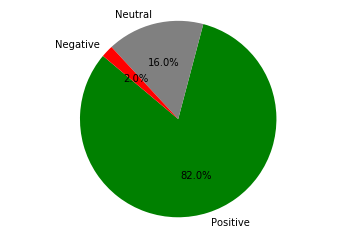

In [66]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

labels = ['Positive', 'Neutral', 'Negative']
sizes = [positivePercent, neutralPercent, negativePercent]

# Set different colors
colors = ['green', 'grey', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()